# 1) Identifying Class Imbalance in Images folder

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import dask.bag as db
import dask.diagnostics
from PIL import Image
import numpy as np
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [4]:
number_classes = {'angry': len(os.listdir("D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\angry")),
'disgust': len(os.listdir("D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\disgust")),
'fear': len(os.listdir("D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\fear")),
'happy': len(os.listdir("D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\happy")),
'neutral': len(os.listdir("D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\neutral")),
'sad': len(os.listdir("D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\sad")),
'surprise': len(os.listdir("D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\surprise")),}

In [5]:
number_classes


{'angry': 3995,
 'disgust': 436,
 'fear': 4097,
 'happy': 7215,
 'neutral': 4965,
 'sad': 4830,
 'surprise': 3171}

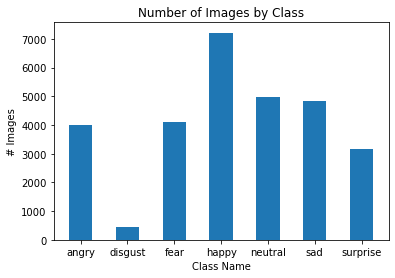

In [6]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

# 2) Consistent image size is crucial for deep learning, mismatched matrices will bring your project to a quick stop.

In [19]:
directories ={'angry': 'D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\angry\\',
'disgust': 'D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\disgust\\',
'fear': 'D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\fear\\',
'happy': 'D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\happy\\',
'neutral': 'D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\neutral\\',
'sad': 'D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\sad\\',
'surprise': 'D:\\Sem4 summer2022\\Capstone\\Dataset\\train\\train\\surprise\\'}

def get_dims(file):
    '''Returns dimenstions for an RGB image'''
    im = Image.open(file)
    arr = np.array(im)
    h,w = arr.shape
    return h,w

[########################################] | 100% Completed | 11.4s
[########################################] | 100% Completed |  3.1s
[########################################] | 100% Completed | 10.5s
[########################################] | 100% Completed | 16.6s
[########################################] | 100% Completed | 11.6s
[########################################] | 100% Completed | 10.5s
[########################################] | 100% Completed |  9.0s


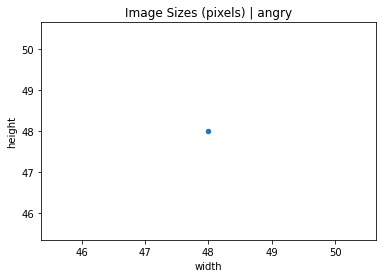

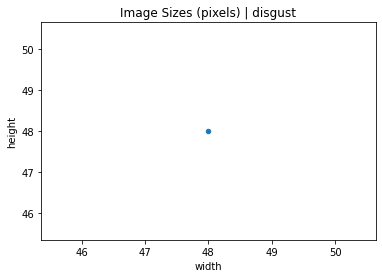

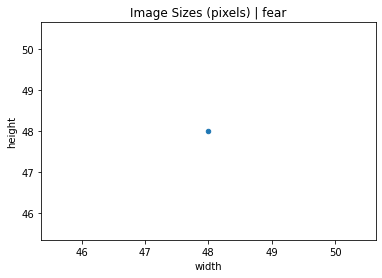

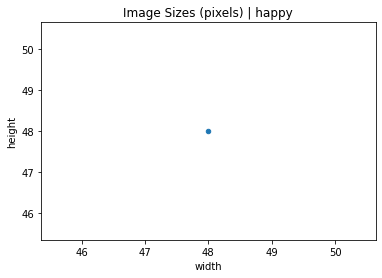

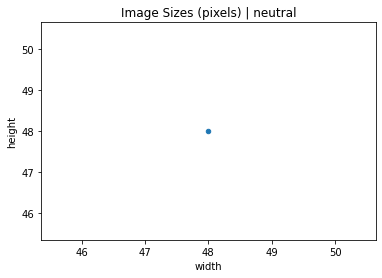

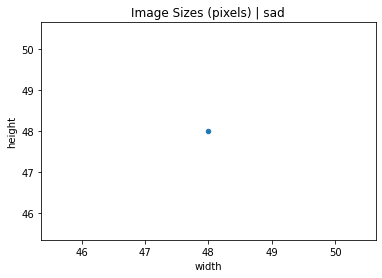

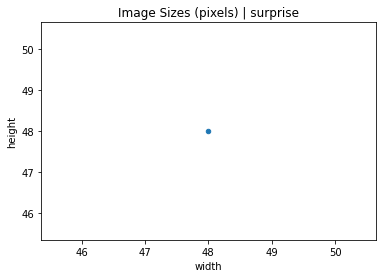

In [20]:
for n,d in directories.items():
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    dims = db.from_sequence(filelist).map(get_dims)
    with dask.diagnostics.ProgressBar():
        dims = dims.compute()
        dim_df = pd.DataFrame(dims, columns=['height', 'width'])
        sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
        sizes.plot.scatter(x='width', y='height');
        plt.title('Image Sizes (pixels) | {}'.format(n))

# 3) Identifying Class imbalance for Audio Folder

In [21]:
paths = []
labels = []
for dirname, _, filenames in os.walk('D:\speech_data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [22]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,D:\speech_data\OAF_angry\OAF_back_angry.wav,angry
1,D:\speech_data\OAF_angry\OAF_bar_angry.wav,angry
2,D:\speech_data\OAF_angry\OAF_base_angry.wav,angry
3,D:\speech_data\OAF_angry\OAF_bath_angry.wav,angry
4,D:\speech_data\OAF_angry\OAF_bean_angry.wav,angry


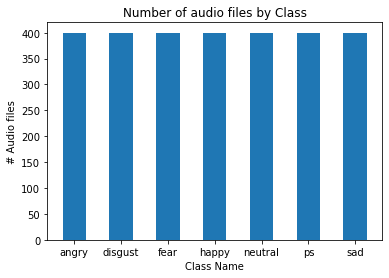

In [23]:
plt.bar(df['label'].unique(),df['label'].value_counts() ,width = .5)
plt.title("Number of audio files by Class");
plt.xlabel('Class Name');
plt.ylabel('# Audio files');

# 4) Showing the Waveform and Spectogram plot for the different classes of audio files

In [28]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    

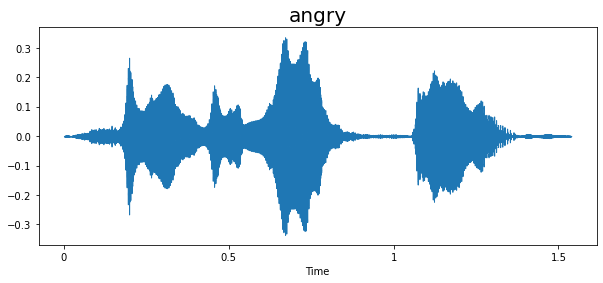

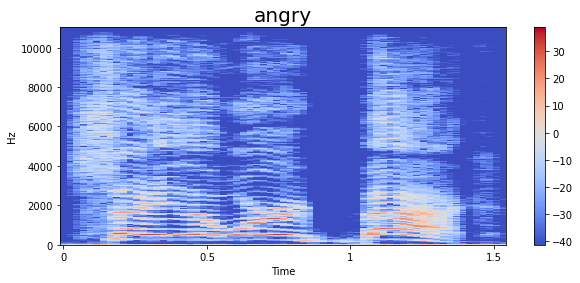

In [29]:
#we can also disply waveplot and specsplot for all the classes  

emotion = 'angry'
path=df['speech'][df['label']==emotion][0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

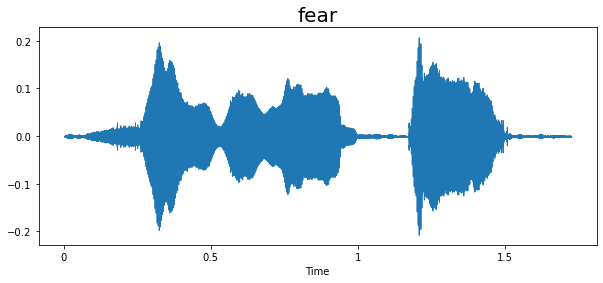

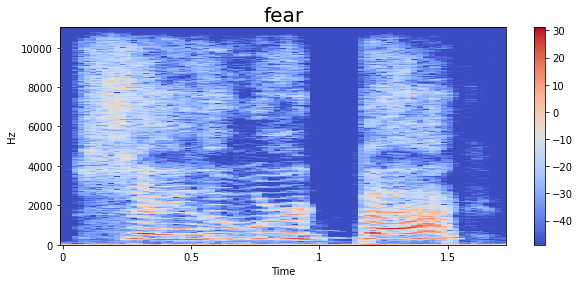

In [37]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

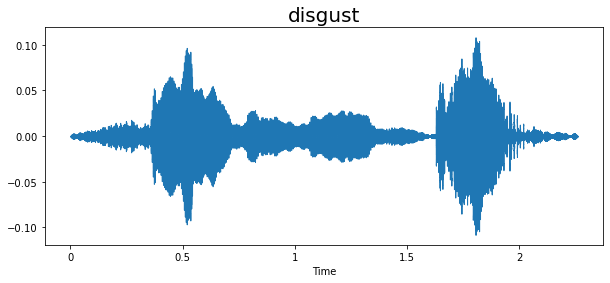

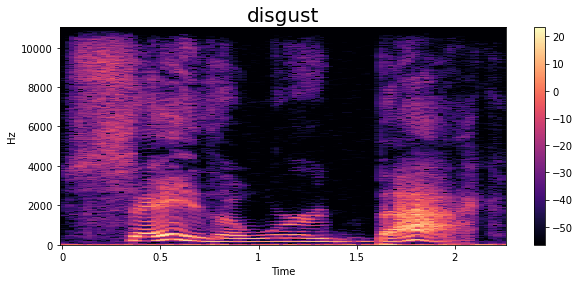

In [31]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

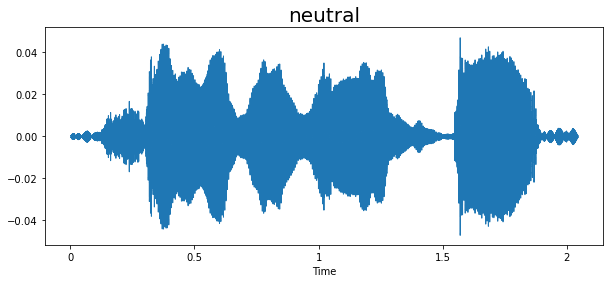

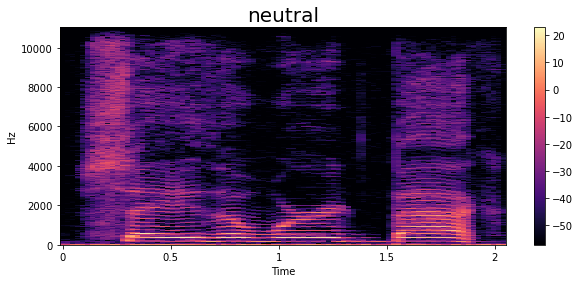

In [32]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

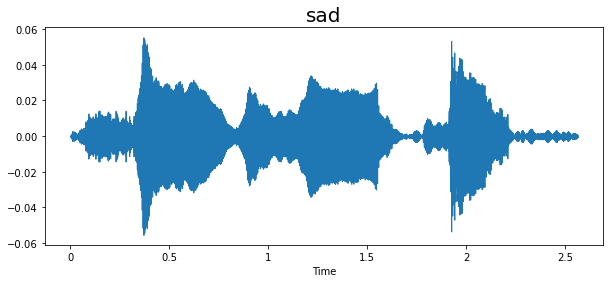

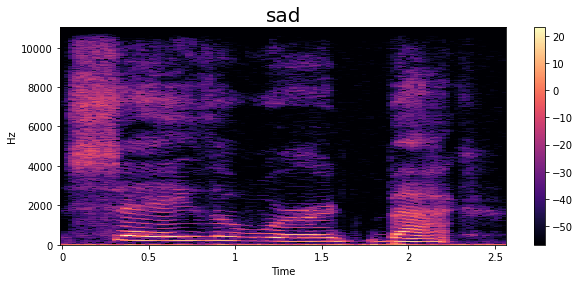

In [33]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

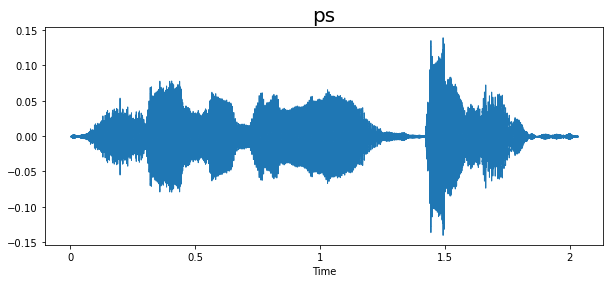

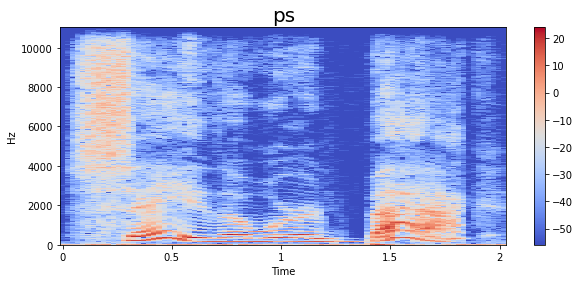

In [34]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

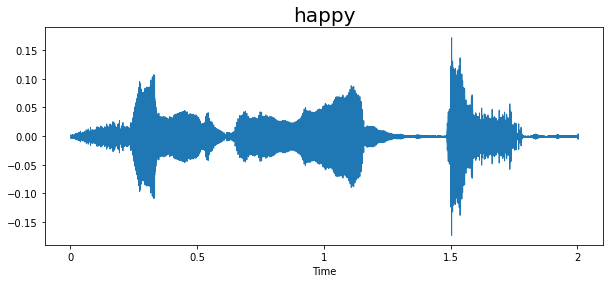

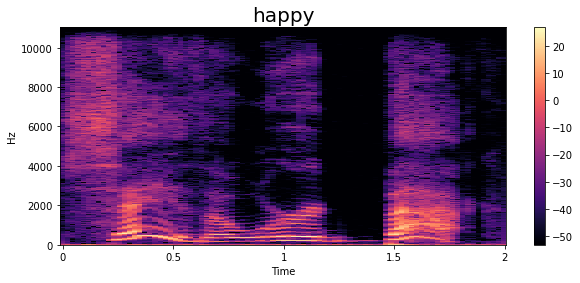

In [35]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

-----


# Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

## A. Data Collection
 - [x] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 - [x] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
 - [ ] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
 - [x] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

## B. Data Storage
 - [x] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
 - [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
 - [x] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

## C. Analysis
 - [x] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
 - [x] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
 - [x] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
 - [ ] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 - [x] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

## D. Modeling
 - [x] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
 - [x] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
 - [x] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
 - [x] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 - [x] **D.5 Communicate bias**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

## E. Deployment
 - [x] **E.1 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 - [x] **E.2 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
 - [ ] **E.3 Concept drift**: Do we test and monitor for concept drift to ensure the model remains fair over time?
 - [x] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?

*Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org).*
